In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [3]:
raw_data.shape

(74111, 29)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

### numerical features

In [5]:
numerical_features = raw_data.select_dtypes(include=['number']).columns 
numerical_features

# target = 'log_price'____need to drop it later

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

### categorical features

In [6]:
categorical_features = raw_data.select_dtypes(include=['category', 'object']).columns
categorical_features

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

### only one boolean feature : cleaning_fee.
!! May convert to 1s and 0s later. !!

In [7]:
#raw_data['cleaning_fee'] = raw_data['cleaning_fee'].map({'True':1 , 'False':0})

In [8]:
raw_data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### Working on Missing records 
and few bool to num conversions (if applicable)

In [9]:
raw_data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

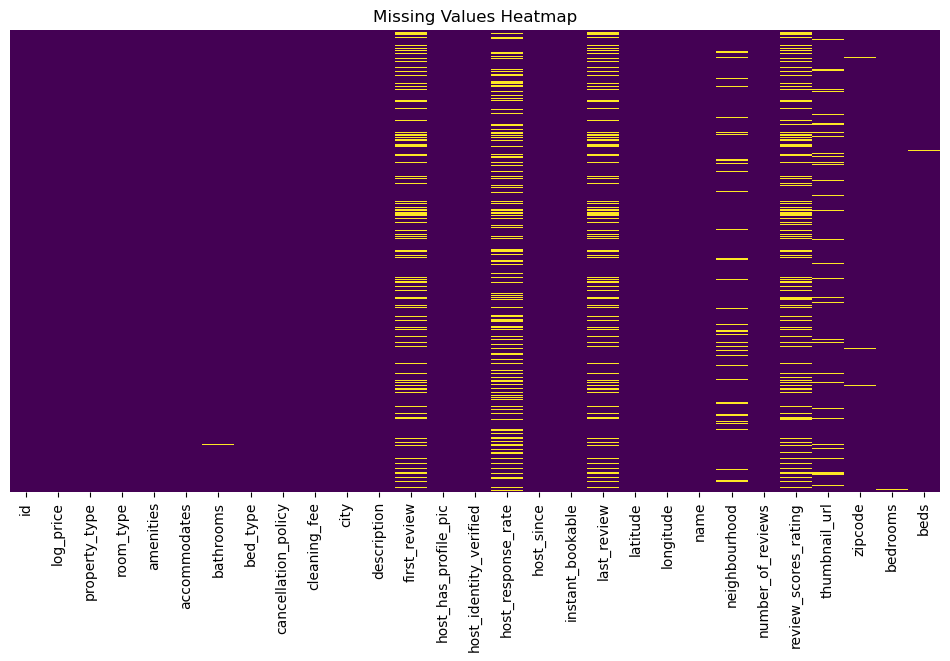

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(raw_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
raw_data['bathrooms'].unique()

# has few missing records - nan can be filled with mode  
# Mode works as we have seen 25th - 75th %ile has 1.0 as value

array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

In [12]:
raw_data['bathrooms'] = raw_data['bathrooms'].fillna(raw_data['bathrooms'].mode()[0])

In [13]:
raw_data['cleaning_fee'] = raw_data['cleaning_fee'].astype(int)
# converting bool to numeric

In [14]:
raw_data['description']
# too much unique text  - can look for few amenities like parking, wifi, breakfast, etc.

0        Beautiful, sunlit brownstone 1-bedroom in the ...
1        Enjoy travelling during your stay in Manhattan...
2        The Oasis comes complete with a full backyard ...
3        This light-filled home-away-from-home is super...
4        Cool, cozy, and comfortable studio located in ...
                               ...                        
74106                            one room in bushwick apt 
74107    Located on the Pacific Coast Highway, this apa...
74108    A modern apartment located in East Williamsbur...
74109    Fully renovated, designer's studio located in ...
74110    You will stay-aboard the Island Trader at one ...
Name: description, Length: 74111, dtype: object

In [15]:
raw_data['host_has_profile_pic'].unique() 

array(['t', nan, 'f'], dtype=object)

In [16]:
raw_data['host_has_profile_pic'] = raw_data['host_has_profile_pic'].fillna('f')

In [17]:
raw_data['host_has_profile_pic'] = raw_data['host_has_profile_pic'].map({'t':1 , 'f':0})

In [18]:
raw_data['host_identity_verified'].unique()

array(['t', 'f', nan], dtype=object)

In [19]:
raw_data['host_identity_verified'] = raw_data['host_identity_verified'].fillna('f')

In [20]:
raw_data['host_identity_verified'] = raw_data['host_identity_verified'].map({'t':1 , 'f':0})

In [21]:
raw_data['host_identity_verified'].fillna(0)

0        1
1        0
2        1
3        1
4        1
        ..
74106    1
74107    0
74108    1
74109    0
74110    1
Name: host_identity_verified, Length: 74111, dtype: int64

In [22]:
raw_data['host_response_rate'].unique()

# %-sign can be removed and data can be converted into numerics
# has lots of missing records - nan can be filled with the mean 

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [23]:
# converting to str first -> removing %-sign -> converting back to float
raw_data['host_response_rate'] = raw_data['host_response_rate'].astype(str).str.rstrip('%').astype(float)

# filling with mean
raw_data['host_response_rate'] = raw_data['host_response_rate'].fillna(raw_data['host_response_rate'].mean())


In [24]:
raw_data['instant_bookable'].unique()

# No missing records 
# may convert to 1s and 0s

array(['f', 't'], dtype=object)

In [25]:
raw_data['instant_bookable'] = raw_data['instant_bookable'].map({'t':1 , 'f':0})

In [26]:
raw_data['neighbourhood'].isnull().sum()
# missing records can be filled with string 'unknown'

6872

In [27]:
raw_data['neighbourhood'] = raw_data['neighbourhood'].fillna('unknown')

In [28]:
# filling null values in review_scores_rating with mean
raw_data['review_scores_rating'] = raw_data['review_scores_rating'].fillna(raw_data['review_scores_rating'].mean())

In [29]:
# filling null values in bedrooms with mean
raw_data['bedrooms'] = raw_data['bedrooms'].fillna(raw_data['bedrooms'].mean())

In [30]:
# filling null values in beds with mean
raw_data['beds'] = raw_data['beds'].fillna(raw_data['beds'].mean())

In [31]:
# filling null values in zipcode with '00000'
raw_data['zipcode'] = raw_data['zipcode'].replace( [None], '00000')

# Feature Engineering

In [32]:
raw_data['first_review']
# has lots of missing records
# date_time format

0        2016-06-18
1        2017-08-05
2        2017-04-30
3               NaN
4        2015-05-12
            ...    
74106           NaN
74107    2016-08-15
74108    2015-01-03
74109           NaN
74110    2013-09-05
Name: first_review, Length: 74111, dtype: object

In [33]:
raw_data['first_review'] = pd.to_datetime(raw_data['first_review'])

oldest_date = raw_data['first_review'].min()
latest_date = raw_data['first_review'].max()

print(oldest_date, latest_date)

2008-11-17 00:00:00 2017-10-05 00:00:00


In [34]:
raw_data['last_review']
# has lots of missing records
# date_time format

0        2016-07-18
1        2017-09-23
2        2017-09-14
3               NaN
4        2017-01-22
            ...    
74106           NaN
74107    2017-04-15
74108    2017-09-10
74109           NaN
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object

In [35]:
raw_data['last_review'] = pd.to_datetime(raw_data['last_review'])

oldest_last_review = raw_data['last_review'].min()
latest_last_review = raw_data['last_review'].max()

print(oldest_last_review, latest_last_review)

2009-01-21 00:00:00 2017-10-05 00:00:00


In [36]:
raw_data['last_review'] = pd.to_datetime(raw_data['last_review'])
date_ceiling = pd.to_datetime('2017-10-05')
raw_data['days_since_last_review'] = (date_ceiling - raw_data['last_review']).dt.days
# raw_data['days_since_last_review'].isnull().sum()

raw_data['days_since_last_review']

conditions = [
    (raw_data['days_since_last_review'] <= 30),
    (raw_data['days_since_last_review'] <= 150),
    (raw_data['days_since_last_review'] <= 365),
    (raw_data['days_since_last_review'] > 365)
]
choices = ['Very Recent', 'Recent', 'Moderate', 'Old']
raw_data['recent_activity'] = np.select(conditions, choices, default='No Review')
raw_data['recent_activity']

0                Old
1        Very Recent
2        Very Recent
3          No Review
4           Moderate
            ...     
74106      No Review
74107       Moderate
74108    Very Recent
74109      No Review
74110       Moderate
Name: recent_activity, Length: 74111, dtype: object

In [37]:
raw_data['host_since'].unique()

# date-time format
# has less missing values - need to think for filling nan

array(['2012-03-26', '2017-06-19', '2016-10-25', ..., '2008-03-03',
       '2010-04-30', '2009-08-23'], dtype=object)

In [38]:
raw_data['host_since'] = pd.to_datetime(raw_data['host_since'])
date_ceiling = pd.to_datetime('2017-10-05')

# Calculating the number of months active for each listing using the ceiling date
raw_data['months_active'] = (date_ceiling.year - raw_data['host_since'].dt.year) * 12 + (date_ceiling.month - raw_data['host_since'].dt.month)

# Calculating average reviews per month
raw_data['average_reviews_per_month'] = raw_data['number_of_reviews'] / raw_data['months_active']

### Derived features indicating the presence of amenities ("Wi-Fi", "parking", "breakfast") from property descriptions using string matching.


In [39]:
raw_data['description'].value_counts(dropna=False)
raw_data['has_wifi'] = raw_data['description'].str.contains('Wi-Fi', case=False).astype(int)
raw_data['has_parking'] = raw_data['description'].str.contains('parking', case=False).astype(int)
raw_data['has_breakfast'] = raw_data['description'].str.contains('breakfast', case=False).astype(int)

In [40]:
raw_data['days_since_last_review'] = raw_data['days_since_last_review'].fillna(0)
raw_data['months_active'] = raw_data['months_active'].fillna(0)
raw_data['average_reviews_per_month'] = raw_data['average_reviews_per_month'].fillna(0)
raw_data['thumbnail_url'] = raw_data['thumbnail_url'].fillna('unknown')

In [41]:
clean_data = raw_data.copy()

In [42]:
clean_data = clean_data.drop(columns=['first_review', 'last_review', 'host_since','thumbnail_url','neighbourhood','description'], errors = 'ignore')

In [43]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         74111 non-null  int64  
 1   log_price                  74111 non-null  float64
 2   property_type              74111 non-null  object 
 3   room_type                  74111 non-null  object 
 4   amenities                  74111 non-null  object 
 5   accommodates               74111 non-null  int64  
 6   bathrooms                  74111 non-null  float64
 7   bed_type                   74111 non-null  object 
 8   cancellation_policy        74111 non-null  object 
 9   cleaning_fee               74111 non-null  int32  
 10  city                       74111 non-null  object 
 11  host_has_profile_pic       74111 non-null  int64  
 12  host_identity_verified     74111 non-null  int64  
 13  host_response_rate         74111 non-null  flo

In [44]:
numerical_features_clean = clean_data.select_dtypes(include=['number'])

In [45]:
numerical_features_corr = numerical_features_clean.drop(columns=['id', 'has_parking', 'has_wifi','has_breakfast','host_has_profile_pic','host_identity_verified'], errors='ignore')

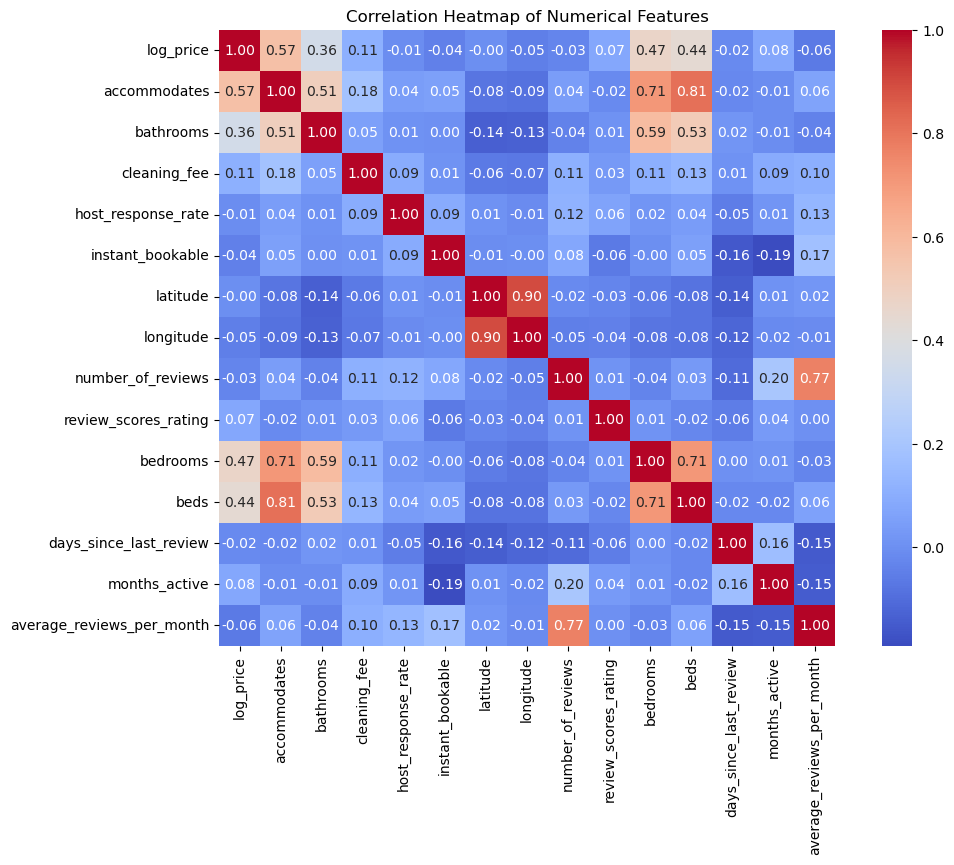

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
#Correlation Heatmap
correlation_matrix = numerical_features_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

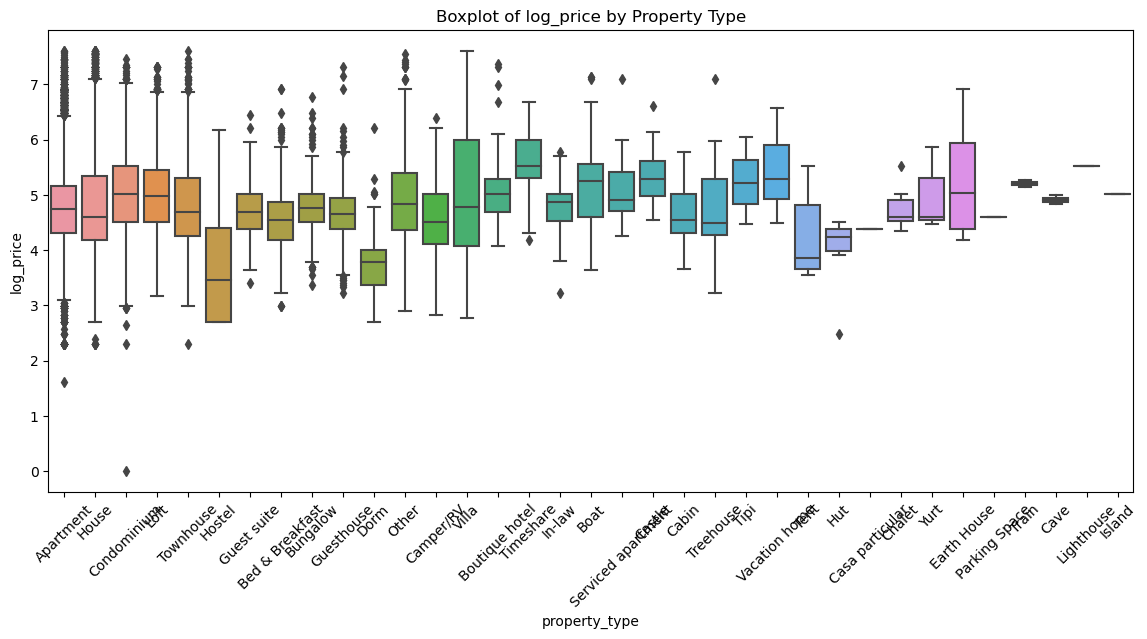

In [47]:
#Boxplots for Categorical Variables
plt.figure(figsize=(14, 6))
sns.boxplot(x='property_type', y='log_price', data=clean_data)
plt.title('Boxplot of log_price by Property Type')
plt.xticks(rotation=45)
plt.show()

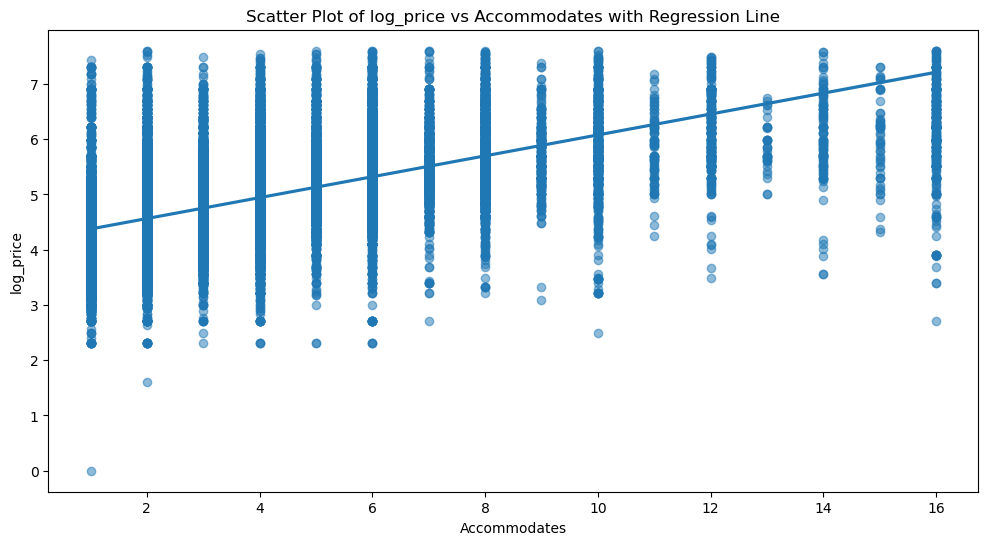

In [48]:
#Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='accommodates', y='log_price', data=clean_data, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of log_price vs Accommodates with Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.show()

C:\Users\srush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


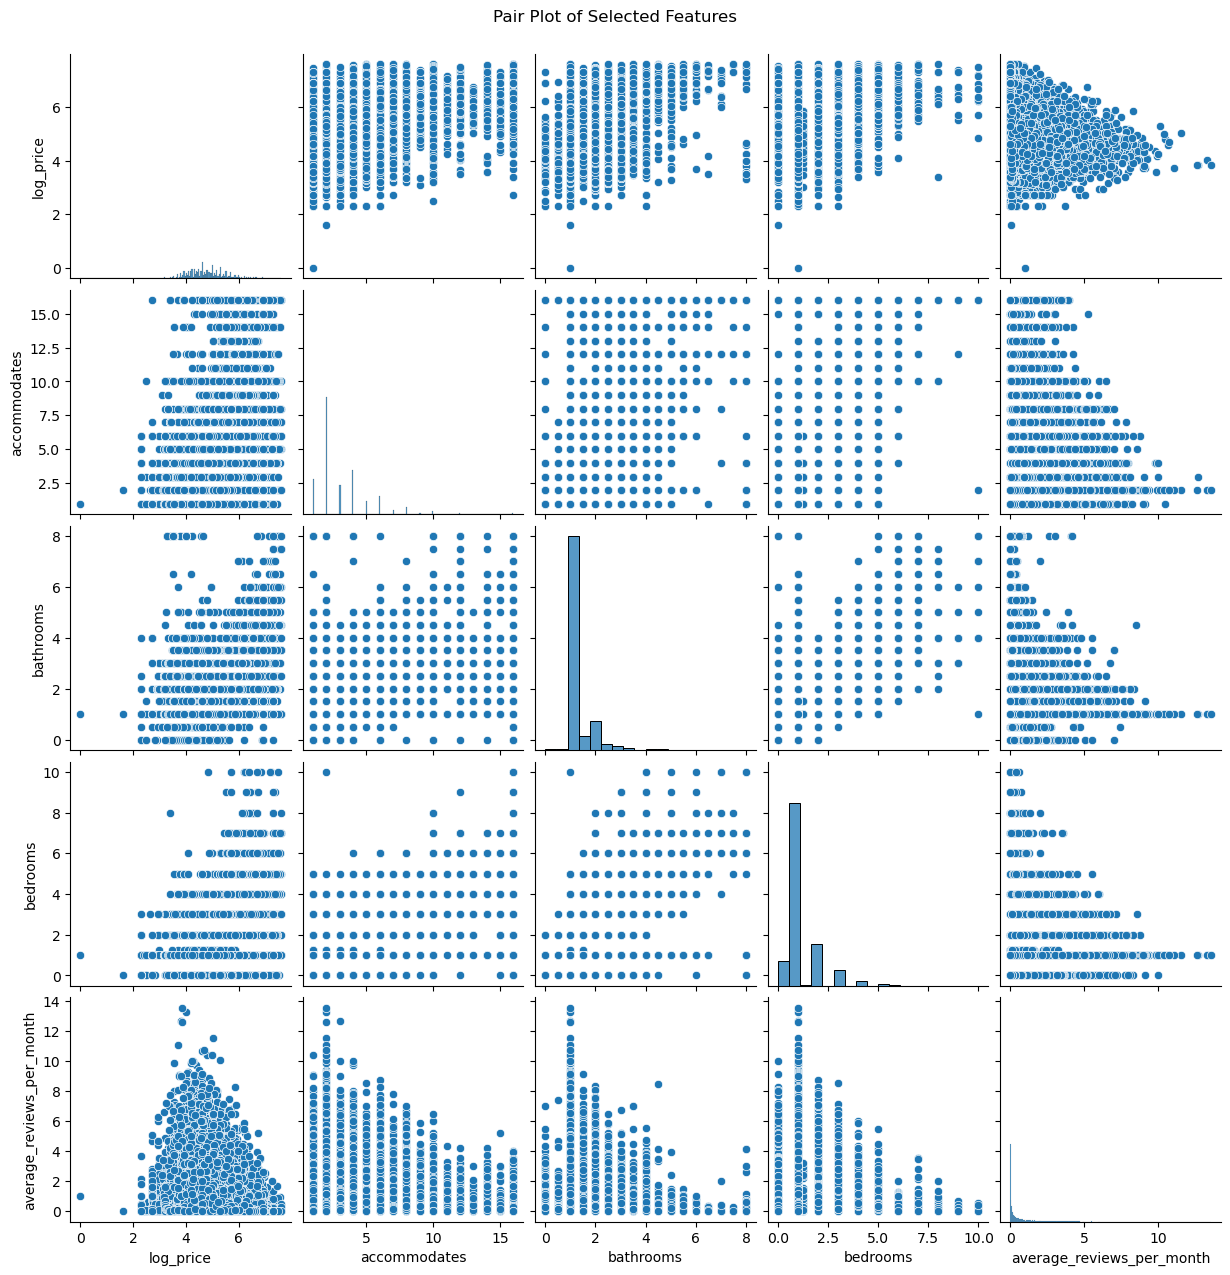

In [49]:
#Pair Plot for Numerical Features
sns.pairplot(clean_data[['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'average_reviews_per_month']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

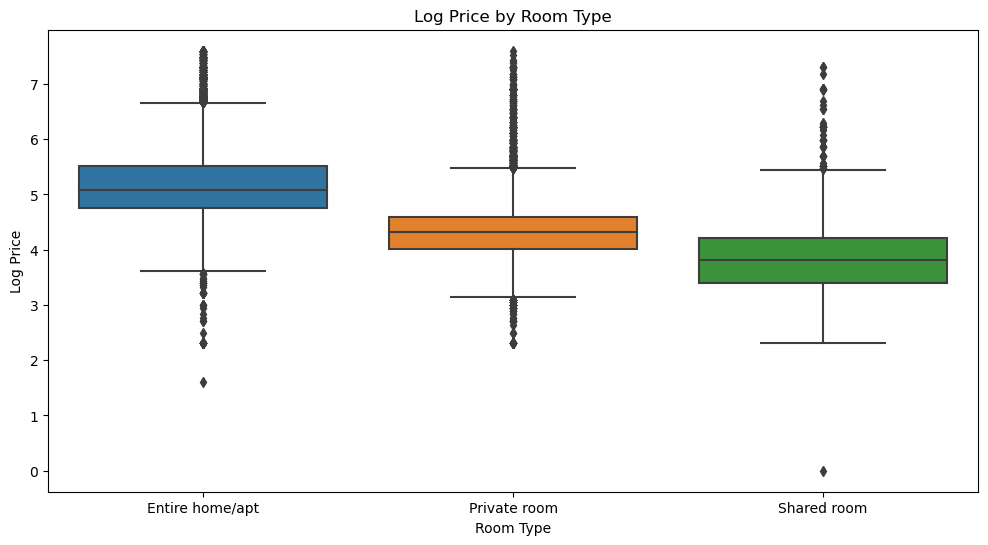

In [50]:
# boxplot of log_price by room_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='log_price', data=clean_data)
plt.title('Log Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Log Price')
plt.show()

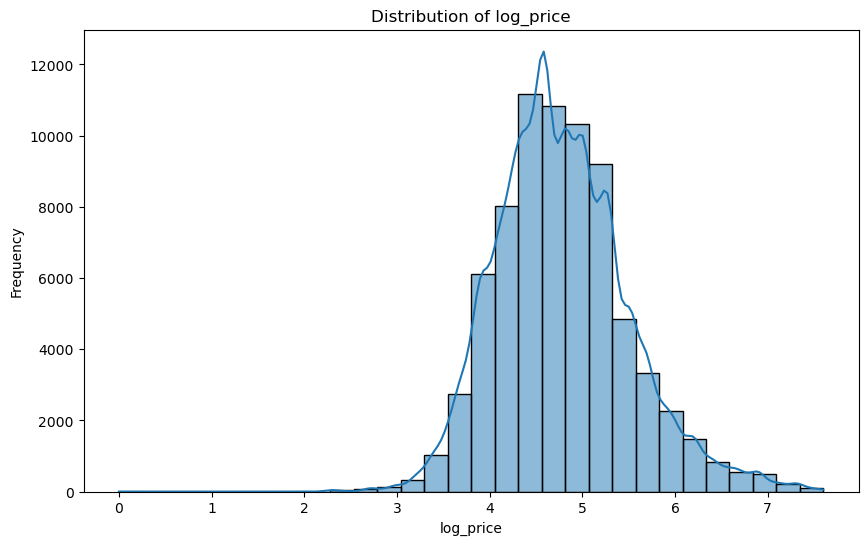

In [51]:
#Distribution of log_price
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['log_price'], kde=True, bins=30)
plt.title("Distribution of log_price")
plt.xlabel("log_price")
plt.ylabel("Frequency")
plt.show()

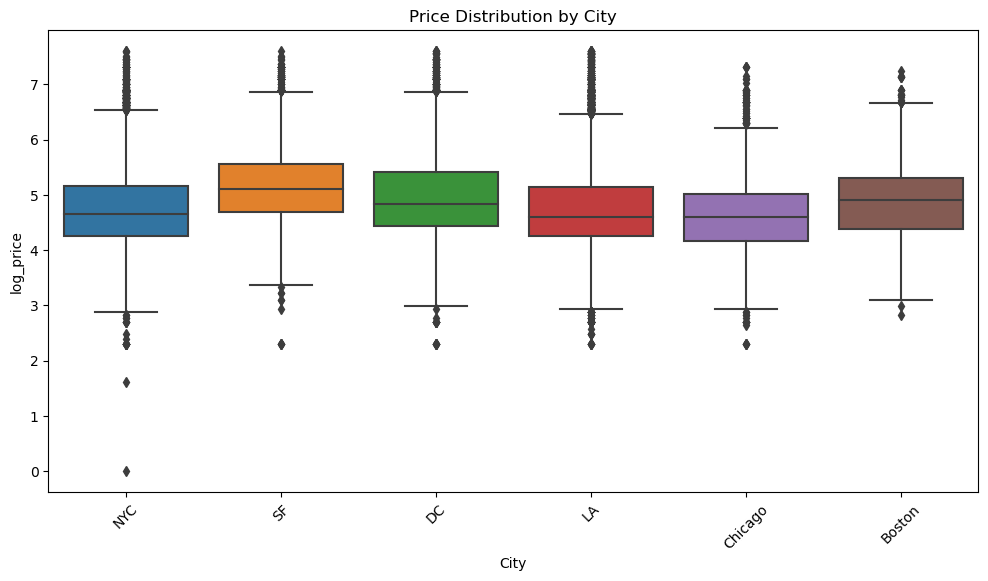

In [52]:
# Price distribution w.r.t city
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data, x='city', y='log_price')
plt.title("Price Distribution by City")
plt.xlabel("City")
plt.ylabel("log_price")
plt.xticks(rotation=45)
plt.show()

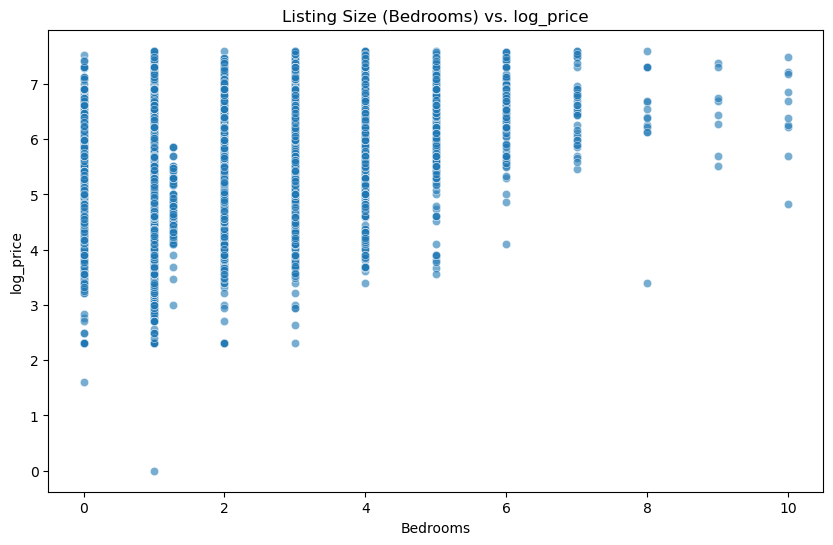

In [53]:
# Scatter plot of bedrooms w.r.t price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_data, x='bedrooms', y='log_price', alpha=0.6)
plt.title("Listing Size (Bedrooms) vs. log_price")
plt.xlabel("Bedrooms")
plt.ylabel("log_price")
plt.show()

In [54]:
import pandas as pd
raw_test = pd.read_csv("test.csv")

In [55]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25458 non-null  int64  
 1   property_type           25458 non-null  object 
 2   room_type               25458 non-null  object 
 3   amenities               25458 non-null  object 
 4   accommodates            25458 non-null  int64  
 5   bathrooms               25379 non-null  float64
 6   bed_type                25458 non-null  object 
 7   cancellation_policy     25458 non-null  object 
 8   cleaning_fee            25458 non-null  bool   
 9   city                    25458 non-null  object 
 10  description             25444 non-null  object 
 11  first_review            20022 non-null  object 
 12  host_has_profile_pic    25403 non-null  object 
 13  host_identity_verified  25403 non-null  object 
 14  host_response_rate      19152 non-null

In [56]:
raw_test.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   79
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                 14
first_review              5436
host_has_profile_pic        55
host_identity_verified      55
host_response_rate        6306
host_since                  55
instant_bookable             0
last_review               5425
latitude                     0
longitude                    0
name                         5
neighbourhood             2465
number_of_reviews            0
review_scores_rating      5717
thumbnail_url             2859
zipcode                    321
bedrooms                    28
beds                        46
dtype: int64

### Cleaning test data same as train data

In [57]:
raw_test['bathrooms'] = raw_test['bathrooms'].fillna(raw_test['bathrooms'].mode()[0])

raw_test['cleaning_fee'] = raw_test['cleaning_fee'].astype(int)

raw_test['host_has_profile_pic'] = raw_test['host_has_profile_pic'].fillna('f')

raw_test['host_identity_verified'] = raw_test['host_identity_verified'].fillna('f')

raw_test['host_identity_verified'].fillna(0)

raw_test['host_response_rate'] = raw_test['host_response_rate'].astype(str).str.rstrip('%').astype(float)

raw_test['instant_bookable'] = raw_test['instant_bookable'].map({'t':1 , 'f':0})

raw_test['neighbourhood'] = raw_test['neighbourhood'].fillna('unknown')

raw_test['review_scores_rating'] = raw_test['review_scores_rating'].fillna(raw_test['review_scores_rating'].mean())

raw_test['bedrooms'] = raw_test['bedrooms'].fillna(raw_test['bedrooms'].mean())

raw_test['zipcode'] = raw_test['zipcode'].replace( [None], '00000')

In [58]:
raw_test['host_has_profile_pic'] = raw_test['host_has_profile_pic'].map({'t':1 , 'f':0})

raw_test['host_identity_verified'] = raw_test['host_identity_verified'].map({'t':1 , 'f':0})

raw_test['host_response_rate'] = raw_test['host_response_rate'].fillna(raw_test['host_response_rate'].mean())

In [59]:
import numpy as np
raw_test['last_review'] = pd.to_datetime(raw_test['last_review'])
date_ceiling = pd.to_datetime('2017-10-05')
raw_test['days_since_last_review'] = (date_ceiling - raw_test['last_review']).dt.days
# raw_test['days_since_last_review'].isnull().sum()

raw_test['days_since_last_review']

conditions = [
    (raw_test['days_since_last_review'] <= 30),
    (raw_test['days_since_last_review'] <= 150),
    (raw_test['days_since_last_review'] <= 365),
    (raw_test['days_since_last_review'] > 365)
]
choices = ['Very Recent', 'Recent', 'Moderate', 'Old']
raw_test['recent_activity'] = np.select(conditions, choices, default='No Review')
raw_test['recent_activity']

0         Moderate
1         Moderate
2         Moderate
3         Moderate
4        No Review
           ...    
25453       Recent
25454    No Review
25455     Moderate
25456    No Review
25457     Moderate
Name: recent_activity, Length: 25458, dtype: object

In [60]:
raw_test['host_since'] = pd.to_datetime(raw_test['host_since'])
date_ceiling = pd.to_datetime('2017-10-05')

# Calculating the number of months active for each listing using the ceiling date
raw_test['months_active'] = (date_ceiling.year - raw_test['host_since'].dt.year) * 12 + (date_ceiling.month - raw_test['host_since'].dt.month)

In [61]:
raw_test['average_reviews_per_month'] = raw_test['number_of_reviews'] / raw_test['months_active']


In [62]:
raw_test['description'] = raw_test['description'].fillna('')
raw_test['has_wifi'] = raw_test['description'].str.contains('Wi-Fi', case=False).astype(int)
raw_test['has_parking'] = raw_test['description'].str.contains('parking', case=False).astype(int)
raw_test['has_breakfast'] = raw_test['description'].str.contains('breakfast', case=False).astype(int)


In [63]:
raw_test['days_since_last_review'] = raw_test['days_since_last_review'].fillna(0)
raw_test['months_active'] = raw_test['months_active'].fillna(0)
raw_test['average_reviews_per_month'] = raw_test['average_reviews_per_month'].fillna(0)
raw_test['thumbnail_url'] = raw_test['thumbnail_url'].fillna('unknown')


In [64]:
raw_test.isnull().sum()

id                              0
property_type                   0
room_type                       0
amenities                       0
accommodates                    0
bathrooms                       0
bed_type                        0
cancellation_policy             0
cleaning_fee                    0
city                            0
description                     0
first_review                 5436
host_has_profile_pic            0
host_identity_verified          0
host_response_rate              0
host_since                     55
instant_bookable                0
last_review                  5425
latitude                        0
longitude                       0
name                            5
neighbourhood                   0
number_of_reviews               0
review_scores_rating            0
thumbnail_url                   0
zipcode                         0
bedrooms                        0
beds                           46
days_since_last_review          0
recent_activit

In [65]:
raw_test = raw_test.drop(columns=['first_review', 'last_review', 'host_since','thumbnail_url','neighbourhood','description'], errors = 'ignore')

In [66]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         25458 non-null  int64  
 1   property_type              25458 non-null  object 
 2   room_type                  25458 non-null  object 
 3   amenities                  25458 non-null  object 
 4   accommodates               25458 non-null  int64  
 5   bathrooms                  25458 non-null  float64
 6   bed_type                   25458 non-null  object 
 7   cancellation_policy        25458 non-null  object 
 8   cleaning_fee               25458 non-null  int32  
 9   city                       25458 non-null  object 
 10  host_has_profile_pic       25458 non-null  int64  
 11  host_identity_verified     25458 non-null  int64  
 12  host_response_rate         25458 non-null  float64
 13  instant_bookable           25458 non-null  int

### Data Splitting

In [67]:
X = clean_data.copy()

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         74111 non-null  int64  
 1   log_price                  74111 non-null  float64
 2   property_type              74111 non-null  object 
 3   room_type                  74111 non-null  object 
 4   amenities                  74111 non-null  object 
 5   accommodates               74111 non-null  int64  
 6   bathrooms                  74111 non-null  float64
 7   bed_type                   74111 non-null  object 
 8   cancellation_policy        74111 non-null  object 
 9   cleaning_fee               74111 non-null  int32  
 10  city                       74111 non-null  object 
 11  host_has_profile_pic       74111 non-null  int64  
 12  host_identity_verified     74111 non-null  int64  
 13  host_response_rate         74111 non-null  flo

### Need for encoding all categorical features.

In [69]:
clean_data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'latitude', 'longitude', 'name', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds',
       'days_since_last_review', 'recent_activity', 'months_active',
       'average_reviews_per_month', 'has_wifi', 'has_parking',
       'has_breakfast'],
      dtype='object')

In [70]:
#X['property_type'].unique()

# Target encoding
global_mean = X['log_price'].mean()
property_stats = X.groupby('property_type')['log_price'].agg(['mean', 'count'])
smoothing = 10
property_stats['smoothed_mean'] = (property_stats['mean'] * property_stats['count'] + global_mean * smoothing) / (property_stats['count'] + smoothing)
X['property_type_encoded'] = X['property_type'].map(property_stats['smoothed_mean'])
#print(X[['property_type', 'log_price', 'property_type_encoded']].head())

# one hot encoding works but so amny more columns will be created
# label encoding can inplace encode but data is unordered and order matters here for correct interpretation

In [71]:
X['room_type'].unique()
X = pd.get_dummies(X, columns=['room_type'], prefix='room_type', drop_first=True)

# label encoding works: 'Entire home/apt' > 'Private room' > 'Shared room'

In [72]:
X['bed_type'].unique()
X = pd.get_dummies(X, columns=['bed_type'], prefix='bed_type', drop_first=True)
# one hot would work I guess

In [73]:
X['amenities'].value_counts()

# Need to think about it

amenities
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               586
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                                                                                                                                              

In [74]:
X['cancellation_policy'].unique()
policy_order = {'flexible': 1, 'moderate': 2, 'strict': 3, 'super_strict_30': 4, 'super_strict_60': 5}
X['cancellation_policy_encoded'] = X['cancellation_policy'].map(policy_order)

# label encoding

In [75]:
X['city'].unique()
# one hot
X = pd.get_dummies(X, columns=['city'], prefix='city', drop_first=True)

In [76]:
X['name'].value_counts()
X = X.drop(columns=['name'])
# Due to high cardinality

In [77]:
X['zipcode'].value_counts()
# Target encoding
global_mean = X['log_price'].mean()
zipcode_stats = X.groupby('zipcode')['log_price'].agg(['mean', 'count'])
smoothing = 10
zipcode_stats['smoothed_mean'] = (zipcode_stats['mean'] * zipcode_stats['count'] + global_mean * smoothing) / (zipcode_stats['count'] + smoothing)
X['zipcode_encoded'] = X['zipcode'].map(zipcode_stats['smoothed_mean'])

In [78]:
X.head()

,id,log_price,property_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_encoded,city_Chicago,city_DC,city_LA,city_NYC,city_SF,zipcode_encoded
0,6901257,5.010635,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,strict,1,1,1,...,False,False,True,3,False,False,False,True,False,4.999257
1,6304928,5.129899,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,strict,1,1,0,...,False,False,True,3,False,False,False,True,False,5.179343
2,7919400,4.976734,Apartment,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,moderate,1,1,1,...,False,False,True,2,False,False,False,True,False,4.658521
3,13418779,6.620073,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,flexible,1,1,1,...,False,False,True,1,False,False,False,False,True,5.115268
4,3808709,4.744932,Apartment,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,moderate,1,1,1,...,False,False,True,2,False,True,False,False,False,5.028115


In [79]:
X['recent_activity'].unique()
# ordinal encoding
activity_order = {'No Review': 0, 'Old': 1, 'Moderate': 2, 'Recent': 3, 'Very Recent': 4}
X['recent_activity_encoded'] = X['recent_activity'].map(activity_order)


## Label encoding 
* room_type
* cancellation_policy
* recent_activity

## one hot encoding


In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           74111 non-null  int64  
 1   log_price                    74111 non-null  float64
 2   property_type                74111 non-null  object 
 3   amenities                    74111 non-null  object 
 4   accommodates                 74111 non-null  int64  
 5   bathrooms                    74111 non-null  float64
 6   cancellation_policy          74111 non-null  object 
 7   cleaning_fee                 74111 non-null  int32  
 8   host_has_profile_pic         74111 non-null  int64  
 9   host_identity_verified       74111 non-null  int64  
 10  host_response_rate           74111 non-null  float64
 11  instant_bookable             74111 non-null  int64  
 12  latitude                     74111 non-null  float64
 13  longitude       

In [81]:
print(X.dtypes == object)

id                             False
log_price                      False
property_type                   True
amenities                       True
accommodates                   False
bathrooms                      False
cancellation_policy             True
cleaning_fee                   False
host_has_profile_pic           False
host_identity_verified         False
host_response_rate             False
instant_bookable               False
latitude                       False
longitude                      False
number_of_reviews              False
review_scores_rating           False
zipcode                         True
bedrooms                       False
beds                           False
days_since_last_review         False
recent_activity                 True
months_active                  False
average_reviews_per_month      False
has_wifi                       False
has_parking                    False
has_breakfast                  False
property_type_encoded          False
r

In [82]:
#dropping all the categorical features
X = X.drop(columns=['property_type','property_type_encoded','amenities','cancellation_policy','recent_activity','zipcode','zipcode_encoded'])

In [83]:
X_backup = X.copy()

## Transforming Test data

In [84]:
test_data = raw_test.copy()

In [85]:
test_data['beds'] = test_data['beds'].fillna(test_data['beds'].mean())

In [86]:
test_data = pd.get_dummies(test_data, columns=['room_type'], prefix='room_type', drop_first=True)

In [87]:
test_data = pd.get_dummies(test_data, columns=['bed_type'], prefix='bed_type', drop_first=True)

In [88]:
policy_order = {'flexible': 1, 'moderate': 2, 'strict': 3, 'super_strict_30': 4, 'super_strict_60': 5}
test_data['cancellation_policy_encoded'] = test_data['cancellation_policy'].map(policy_order)

In [89]:
test_data = pd.get_dummies(test_data, columns=['city'], prefix='city', drop_first=True)

In [90]:
activity_order = {'No Review': 0, 'Old': 1, 'Moderate': 2, 'Recent': 3, 'Very Recent': 4}
test_data['recent_activity_encoded'] = test_data['recent_activity'].map(activity_order)

In [91]:
test_data = test_data.drop(columns=['name','property_type','amenities','cancellation_policy','recent_activity','zipcode'])

In [92]:
test_data['cancellation_policy_encoded'] = test_data['cancellation_policy_encoded'].fillna(test_data['cancellation_policy_encoded'].mode()[0])

In [93]:
# property_type
'''
global_mean = test_data['log_price'].mean()
property_stats = test_data.groupby('property_type')['log_price'].agg(['mean', 'count'])
smoothing = 10
property_stats['smoothed_mean'] = (property_stats['mean'] * property_stats['count'] + global_mean * smoothing) / (property_stats['count'] + smoothing)
test_data['property_type_encoded'] = test_data['property_type'].map(property_stats['smoothed_mean'])'''

# zipcode
'''global_mean = X['log_price'].mean()
zipcode_stats = X.groupby('zipcode')['log_price'].agg(['mean', 'count'])
smoothing = 10
zipcode_stats['smoothed_mean'] = (zipcode_stats['mean'] * zipcode_stats['count'] + global_mean * smoothing) / (zipcode_stats['count'] + smoothing)
X['zipcode_encoded'] = X['zipcode'].map(zipcode_stats['smoothed_mean'])'''

"global_mean = X['log_price'].mean()\nzipcode_stats = X.groupby('zipcode')['log_price'].agg(['mean', 'count'])\nsmoothing = 10\nzipcode_stats['smoothed_mean'] = (zipcode_stats['mean'] * zipcode_stats['count'] + global_mean * smoothing) / (zipcode_stats['count'] + smoothing)\nX['zipcode_encoded'] = X['zipcode'].map(zipcode_stats['smoothed_mean'])"

### Just comparing if we have successfully obtained similar features after test data transformation

In [94]:
test_data.columns

Index(['id', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'days_since_last_review',
       'months_active', 'average_reviews_per_month', 'has_wifi', 'has_parking',
       'has_breakfast', 'room_type_Private room', 'room_type_Shared room',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_encoded', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'recent_activity_encoded'],
      dtype='object')

In [95]:
X.columns 

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'days_since_last_review',
       'months_active', 'average_reviews_per_month', 'has_wifi', 'has_parking',
       'has_breakfast', 'room_type_Private room', 'room_type_Shared room',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_encoded', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF', 'recent_activity_encoded'],
      dtype='object')

# Model Building

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
#from ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error as MSE


In [97]:
y = X['log_price']
X = X.drop(columns = ['log_price'])

In [98]:
from sklearn.model_selection import train_test_split

SEED=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

Decision Tree Regressor

In [99]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

RMSE_dt = (MSE(y_pred_dt, y_test))**0.5

print("RMSE of Decision Tree Regressor = {:.3f}".format(RMSE_dt))

RMSE of Decision Tree Regressor = 0.560


Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

RMSE_rf = (MSE(y_pred_rf, y_test))**0.5

print("RMSE of Random Forest Regressor = {:.3f}".format(RMSE_rf))

RMSE of Random Forest Regressor = 0.396


In [102]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [103]:
# Initialize the model with some hyperparameters (these can be tuned further)
xgb_model = XGBRegressor(
    n_estimators=1000,       # Number of trees
    learning_rate=0.05,      # Learning rate for gradient descent
    max_depth=6,             # Maximum depth of a tree
    subsample=0.8,           # Subsample ratio of the training data
    colsample_bytree=0.8,    # Subsample ratio of columns for each tree
    random_state=42          # For reproducibility
)

# Fit the model on the training set
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [104]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 0.38331389460385495


In [108]:
pip install --upgrade xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/fe/df/e3a1f3f008db8d2b199ded2168014c7784b8027714b74d802c892815fd72/xgboost-2.1.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 722.1 kB/s eta 0:02:53
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.8/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 1.2/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 1.7/124.9 MB 4.4 MB/s eta 0:00:29
    -------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\srush\\anaconda3\\Lib\\site-packages\\~gboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



   ---------------------------------------  122.4/124.9 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  122.6/124.9 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  122.9/124.9 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  123.1/124.9 MB 3.6 MB/s eta 0:00:01
   -------------------------------------

In [110]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42  # Use 25% for validation
)

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=1000,       # Maximum number of trees
    learning_rate=0.05,      # Learning rate
    max_depth=8,             # Depth of each tree
    subsample=0.8,           # Subsample ratio of the training set
    colsample_bytree=0.8,    # Subsample ratio of features per tree
    eval_metric="rmse",      # Metric to optimize
    random_state=42          # For reproducibility
)

# Train the model and manually monitor validation metrics
eval_results = {}
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],   # Validation set for monitoring
    verbose=True                # Output progress
)

# Predict and evaluate on the validation set
y_val_pred = xgb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse}")

[0]	validation_0-rmse:0.69686
[1]	validation_0-rmse:0.67612
[2]	validation_0-rmse:0.65789
[3]	validation_0-rmse:0.64078
[4]	validation_0-rmse:0.62349
[5]	validation_0-rmse:0.60749
[6]	validation_0-rmse:0.59380
[7]	validation_0-rmse:0.58062
[8]	validation_0-rmse:0.56841
[9]	validation_0-rmse:0.55689
[10]	validation_0-rmse:0.54617
[11]	validation_0-rmse:0.53545
[12]	validation_0-rmse:0.52580
[13]	validation_0-rmse:0.51750
[14]	validation_0-rmse:0.51044
[15]	validation_0-rmse:0.50321
[16]	validation_0-rmse:0.49613
[17]	validation_0-rmse:0.48891
[18]	validation_0-rmse:0.48298
[19]	validation_0-rmse:0.47680
[20]	validation_0-rmse:0.47120
[21]	validation_0-rmse:0.46612
[22]	validation_0-rmse:0.46126
[23]	validation_0-rmse:0.45696
[24]	validation_0-rmse:0.45275
[25]	validation_0-rmse:0.44937
[26]	validation_0-rmse:0.44598
[27]	validation_0-rmse:0.44269
[28]	validation_0-rmse:0.43962
[29]	validation_0-rmse:0.43661
[30]	validation_0-rmse:0.43396
[31]	validation_0-rmse:0.43163
[32]	validation_0-

In [112]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Convert data into DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.01,           # Learning rate
    "max_depth": 8,                  # Depth of trees
    "subsample": 0.8,                # Subsample ratio of training data
    "colsample_bytree": 0.6,         # Subsample ratio of features
    "lambda": 1.0,                   # L2 regularization
    "alpha": 0.5                     # L1 regularization
}

# Train the model with early stopping
evals = [(dtrain, "train"), (dval, "eval")]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1500,        # Maximum number of boosting rounds
    evals=evals,                 # Evaluation sets
    early_stopping_rounds=50,    # Stop if no improvement in 50 rounds
    verbose_eval=True            # Show progress
)

# Predict on validation set
y_val_pred = bst.predict(dval)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse}")

[0]	train-rmse:0.71354	eval-rmse:0.71306
[1]	train-rmse:0.70938	eval-rmse:0.70899
[2]	train-rmse:0.70546	eval-rmse:0.70514
[3]	train-rmse:0.70187	eval-rmse:0.70161
[4]	train-rmse:0.69755	eval-rmse:0.69730
[5]	train-rmse:0.69404	eval-rmse:0.69385
[6]	train-rmse:0.69039	eval-rmse:0.69027
[7]	train-rmse:0.68717	eval-rmse:0.68711
[8]	train-rmse:0.68360	eval-rmse:0.68358
[9]	train-rmse:0.67991	eval-rmse:0.67995
[10]	train-rmse:0.67629	eval-rmse:0.67639
[11]	train-rmse:0.67235	eval-rmse:0.67252
[12]	train-rmse:0.66872	eval-rmse:0.66899
[13]	train-rmse:0.66519	eval-rmse:0.66552
[14]	train-rmse:0.66240	eval-rmse:0.66281
[15]	train-rmse:0.65980	eval-rmse:0.66029
[16]	train-rmse:0.65682	eval-rmse:0.65740
[17]	train-rmse:0.65306	eval-rmse:0.65370
[18]	train-rmse:0.64984	eval-rmse:0.65054
[19]	train-rmse:0.64685	eval-rmse:0.64765
[20]	train-rmse:0.64340	eval-rmse:0.64428
[21]	train-rmse:0.64021	eval-rmse:0.64122
[22]	train-rmse:0.63685	eval-rmse:0.63791
[23]	train-rmse:0.63375	eval-rmse:0.63492
[2

In [114]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Convert data into DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.01,           # Learning rate
    "max_depth": 8,                  # Depth of trees
    "subsample": 0.6,                # Subsample ratio of training data
    "colsample_bytree": 0.6,         # Subsample ratio of features
    "lambda": 1.0,                   # L2 regularization
    "alpha": 0.5                     # L1 regularization
}

# Train the model with early stopping
evals = [(dtrain, "train"), (dval, "eval")]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=2000,        # Maximum number of boosting rounds
    evals=evals,                 # Evaluation sets
    early_stopping_rounds=50,    # Stop if no improvement in 50 rounds
    verbose_eval=True            # Show progress
)

# Predict on validation set
y_val_pred = bst.predict(dval)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse}")

[0]	train-rmse:0.71354	eval-rmse:0.71306
[1]	train-rmse:0.70941	eval-rmse:0.70903
[2]	train-rmse:0.70552	eval-rmse:0.70519
[3]	train-rmse:0.70196	eval-rmse:0.70171
[4]	train-rmse:0.69762	eval-rmse:0.69740
[5]	train-rmse:0.69416	eval-rmse:0.69397
[6]	train-rmse:0.69051	eval-rmse:0.69039
[7]	train-rmse:0.68728	eval-rmse:0.68723
[8]	train-rmse:0.68374	eval-rmse:0.68374
[9]	train-rmse:0.68009	eval-rmse:0.68015
[10]	train-rmse:0.67654	eval-rmse:0.67666
[11]	train-rmse:0.67262	eval-rmse:0.67280
[12]	train-rmse:0.66904	eval-rmse:0.66930
[13]	train-rmse:0.66553	eval-rmse:0.66584
[14]	train-rmse:0.66274	eval-rmse:0.66316
[15]	train-rmse:0.66017	eval-rmse:0.66067
[16]	train-rmse:0.65719	eval-rmse:0.65777
[17]	train-rmse:0.65347	eval-rmse:0.65411
[18]	train-rmse:0.65028	eval-rmse:0.65097
[19]	train-rmse:0.64731	eval-rmse:0.64810
[20]	train-rmse:0.64388	eval-rmse:0.64473
[21]	train-rmse:0.64067	eval-rmse:0.64163
[22]	train-rmse:0.63731	eval-rmse:0.63831
[23]	train-rmse:0.63423	eval-rmse:0.63535
[2

In [117]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Convert data into DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.01,           # Learning rate
    "max_depth": 8,                  # Depth of trees
    "subsample": 0.8,                # Subsample ratio of training data
    "colsample_bytree": 0.8,         # Subsample ratio of features
    "lambda": 1.0,                   # L2 regularization
    "alpha": 0.5                     # L1 regularization
}

# Train the model with early stopping
evals = [(dtrain, "train"), (dval, "eval")]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=3500,        # Maximum number of boosting rounds
    evals=evals,                 # Evaluation sets
    early_stopping_rounds=50,    # Stop if no improvement in 50 rounds
    verbose_eval=True            # Show progress
)

# Predict on validation set
y_val_pred = bst.predict(dval)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse}")

[0]	train-rmse:0.71341	eval-rmse:0.71296
[1]	train-rmse:0.70900	eval-rmse:0.70858
[2]	train-rmse:0.70486	eval-rmse:0.70449
[3]	train-rmse:0.70073	eval-rmse:0.70043
[4]	train-rmse:0.69642	eval-rmse:0.69613
[5]	train-rmse:0.69218	eval-rmse:0.69196
[6]	train-rmse:0.68829	eval-rmse:0.68813
[7]	train-rmse:0.68430	eval-rmse:0.68421
[8]	train-rmse:0.68038	eval-rmse:0.68036
[9]	train-rmse:0.67671	eval-rmse:0.67677
[10]	train-rmse:0.67297	eval-rmse:0.67308
[11]	train-rmse:0.66902	eval-rmse:0.66922
[12]	train-rmse:0.66525	eval-rmse:0.66552
[13]	train-rmse:0.66176	eval-rmse:0.66209
[14]	train-rmse:0.65869	eval-rmse:0.65911
[15]	train-rmse:0.65523	eval-rmse:0.65570
[16]	train-rmse:0.65186	eval-rmse:0.65242
[17]	train-rmse:0.64817	eval-rmse:0.64881
[18]	train-rmse:0.64474	eval-rmse:0.64546
[19]	train-rmse:0.64120	eval-rmse:0.64196
[20]	train-rmse:0.63765	eval-rmse:0.63848
[21]	train-rmse:0.63435	eval-rmse:0.63527
[22]	train-rmse:0.63099	eval-rmse:0.63198
[23]	train-rmse:0.62792	eval-rmse:0.62903
[2